In [1]:
# Load some test data
import pandas as pd
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
#dat = dat[dat.price < 2000000]
dat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
dat['date'] = pd.to_datetime(dat['date'])
dat['year'] = dat['date'].apply(lambda x: x.year)
dat['day'] = dat['date'].apply(lambda x: x.day)
dat['month'] = dat['date'].apply(lambda x: x.month)

In [3]:
dat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,13,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,9,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,25,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,9,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,18,2


In [4]:
encoded = pd.get_dummies(dat)

In [5]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [6]:
# Get our target variable and features and split them into test and train datasets

X = dat.drop(['price', 'id', 'date', 'lat', 'long'], axis=1)
y = dat['price']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25)

In [7]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
history = model.fit(X_train, y_train)

In [8]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([307628.6 , 529185.9 , 280233.8 , ..., 689336.7 , 383204.16,
       314277.94], dtype=float32)

In [9]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

# Looks like we're off by just 4.5 dat on average
# Not bad for a quick run with no real preprocessing

149650.8438027729

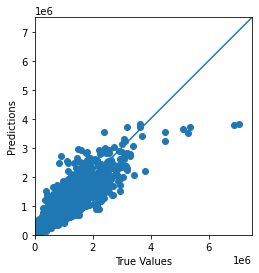

In [11]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 7500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [20]:
housing_drop = dat.drop(['zipcode', 'price', 'id', 'date'], axis=1)
housing_drop['zipcode'] = dat['zipcode']

In [21]:
housing_drop.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,98178
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,98125
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,98028
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,98136
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,98074


In [10]:
'''columns = housing_drop.columns
print(list(columns))
for i in range(len(columns)):
    housing_drop.columns[i] = columns[i]'''

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode']


TypeError: Index does not support mutable operations

In [ ]:
#from sklearn.metrics import r2_score
#r2_score()

In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 250000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [25]:
plot_loss(history)

AttributeError: 'XGBRegressor' object has no attribute 'history'

In [42]:
dat_high = dat[dat.price > 4000000]
dat_high.head()
dat_low = dat[dat.price < 4000000]
pd.set_option('display.max_rows', 5000)
print(dat.price.max() - dat.price.min())
dat.price.value_counts().sort_index()

7625000.0


75000.0        1
78000.0        1
80000.0        1
81000.0        1
82000.0        1
82500.0        1
83000.0        1
84000.0        1
85000.0        2
86500.0        1
89000.0        1
89950.0        1
90000.0        5
92000.0        1
95000.0        4
96500.0        1
99000.0        1
100000.0       6
102500.0       1
104950.0       1
105000.0       2
105500.0       1
106000.0       1
107000.0       2
109000.0       1
109500.0       1
110000.0       8
110700.0       1
111300.0       1
112000.0       1
114000.0       1
114975.0       1
115000.0       7
118000.0       1
118125.0       1
119500.0       1
119900.0       1
120000.0       3
120750.0       1
121800.0       1
122000.0       4
123000.0       1
123300.0       1
124000.0       2
124500.0       1
124740.0       1
125000.0       5
126000.0       1
126500.0       1
128000.0       3
128750.0       1
129000.0       3
129888.0       1
130000.0       8
132500.0       2
132825.0       1
133000.0       2
133400.0       1
134000.0      